In [91]:
###
# This code answer a question:
# Making a relationship between the number of contacts and campaign success
# what are the relevant points to be observed?
# By Sidon 2018
###

Null Hypothesis:<br>
There is no relationship between the number of contacts and campaign success.<br>
H0 = There is no relationship between the two categorical variables - they are indepent.

Alternative Hypothesis:<br>
There is relationship between the number of contacts and campaign success.<br>
H1 = There is a relationship between the two categorical variables - they are not idependent.

H0 = proportion of number of contacts = proportion of success<br>
h1 = proportion of number of contacts != proportion of success

chi-square test of independence:<br>
The idea behind the chi-square test of independence, much like the analysis of variance is to measure how far the data are from what is claimed in the null hypothesis. The further the data are from the null hypothesis, the more evidence the data presents against it. 

In [92]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from tabulate import tabulate, tabulate_formats
from utils import Dataset
%matplotlib inline 

In [93]:
ds =  Dataset()
data = ds.get_data(['campaign','previous','y'])

In [94]:
# Inserir coluna para totalizar os contatos realizados
tt_contacts = data.campaign+data['previous'] 
data.insert(loc=2, column='tt_contacts', value=tt_contacts)

In [95]:
# Copy for conveniency
data1 = data.copy()

In [96]:
# Remove outliers
q = data1['tt_contacts'].quantile(0.99)
data1 = data1[data1['tt_contacts']<q]

In [97]:
data1

,campaign,previous,tt_contacts,y
0,1,0,1,no
1,1,0,1,no
2,1,0,1,no
3,1,0,1,no
4,1,0,1,no
...,...,...,...,...
45206,3,0,3,yes
45207,2,0,2,yes
45208,5,3,8,yes
45209,4,0,4,no


In [98]:
# contingency table of observed counts
ct_campaign = pd.crosstab(data1.y, data1.campaign)
ct_total = pd.crosstab(data1.y, data1.tt_contacts)

#ct = pd.crosstab(data1.y, [data1.campaign, data1.previous, data1.tt_contacts],colnames=['campaign','previous','total'])
ct = pd.DataFrame(data1.groupby(by=['tt_contacts','campaign','previous', 'y']).size())


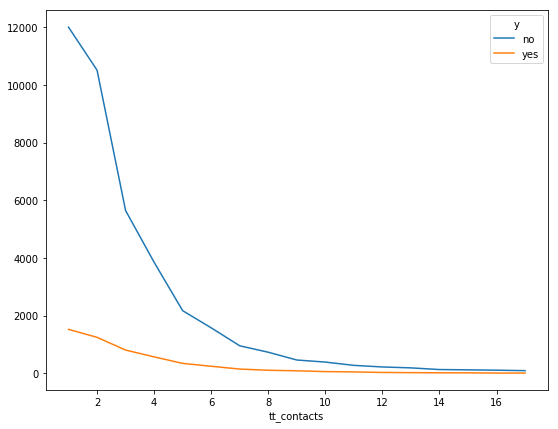

In [99]:
ct_total.T.plot(figsize=(9, 7))

In [100]:
# column percentages
colsum=ct_total.sum(axis=0)
colsum.astype(int)
colpct=ct_total/colsum

colsum_campaingn=ct_campaign.sum(axis=0)
colsum_campaingn.astype(int)

colpct_t = colpct.T.sort_values(by=['yes'], ascending=False)
colpct_t.insert(loc=0, column='Freq.', value=colsum)

In [101]:
print('Totals contacts frequency (campaing + previous)')
print(tabulate(colpct_t, tablefmt='fancy_grid', headers='keys', numalign="decimal"))

Totals contacts frequency (campaing + previous)
╒═══════════════╤═════════╤══════════╤═══════════╕
│   tt_contacts │   Freq. │       no │       yes │
╞═══════════════╪═════════╪══════════╪═══════════╡
│             9 │     546 │ 0.842491 │ 0.157509  │
├───────────────┼─────────┼──────────┼───────────┤
│            11 │     321 │ 0.853583 │ 0.146417  │
├───────────────┼─────────┼──────────┼───────────┤
│             5 │    2514 │ 0.863564 │ 0.136436  │
├───────────────┼─────────┼──────────┼───────────┤
│             6 │    1819 │ 0.86641  │ 0.13359   │
├───────────────┼─────────┼──────────┼───────────┤
│             7 │    1099 │ 0.867152 │ 0.132848  │
├───────────────┼─────────┼──────────┼───────────┤
│            10 │     446 │ 0.869955 │ 0.130045  │
├───────────────┼─────────┼──────────┼───────────┤
│             4 │    4419 │ 0.871238 │ 0.128762  │
├───────────────┼─────────┼──────────┼───────────┤
│             3 │    6449 │ 0.875174 │ 0.124826  │
├───────────────┼─────────┼───────

``` 
lambda_ : float or str, optional

lambda_ gives the power in the Cressie-Read power divergence statistic. The default is 1. For convenience, lambda_ may be assigned one of the following strings, in which case the corresponding numerical value is used:

String              Value   Description
"pearson"             1     Pearson's chi-squared statistic.
                            In this case, the function is
                            equivalent to `stats.chisquare`.
"log-likelihood"      0     Log-likelihood ratio. Also known as
                            the G-test [R256]_.
"freeman-tukey"      -1/2   Freeman-Tukey statistic.
"mod-log-likelihood" -1     Modified log-likelihood ratio.
"neyman"             -2     Neyman's statistic.
"cressie-read"        2/3   The power recommended in [R258]_.
```

In [102]:
# G-test for totals
chi2g = {}
cs1 = stats.chi2_contingency(ct_total, lambda_="log-likelihood")
chi2g['chi-square'] = [cs1[0]]
chi2g['p-value'] = [cs1[1]]
chi2g['dof'] = [cs1[2]]
# chi2g['expected'] = [cs1[3]]

In [103]:
print ('Log-likelihood ratio. Also known as the G-test. for totals contacts x success')
print (tabulate(chi2g, tablefmt='fancy_grid', headers='keys', numalign="center"))

Log-likelihood ratio. Also known as the G-test. for totals contacts x success
╒══════════════╤═════════════╤═══════╕
│  chi-square  │   p-value   │  dof  │
╞══════════════╪═════════════╪═══════╡
│   60.1768    │ 4.88676e-07 │  16   │
╘══════════════╧═════════════╧═══════╛


In [104]:
# Freeman-Turkey test for totals
chi2ft = {}
cs2 = stats.chi2_contingency(ct_total, lambda_="freeman-tukey")
chi2ft['chi-square'] = [cs2[0]]
chi2ft['p-value'] = [cs2[1]]
chi2ft['dof'] = [cs2[2]]
# chi2ft['expected'] = [cs2[3]]

In [105]:
print('Freeman-Tukey statistic. for totals contacts x success')
print(tabulate(chi2ft, tablefmt='fancy_grid', headers='keys', numalign="center"))

Freeman-Tukey statistic. for totals contacts x success
╒══════════════╤═════════════╤═══════╕
│  chi-square  │   p-value   │  dof  │
╞══════════════╪═════════════╪═══════╡
│    60.278    │ 4.69836e-07 │  16   │
╘══════════════╧═════════════╧═══════╛


### Conclusion
- The Pearson's chi-squared statistic test was avoided by  there were frequencies under 5, then I was used 2 tests:  Log-likelihood ratio (G-test) and Freeman-Tukey statistic, in both results, is possible to notice that we can reject the null hypothesis, i.e. there is a correlation between the number of contacts and the success of campaign.

- 

In [106]:
#########################################################################################

In [107]:
# G-test
chi2g_campaingn = {}
chi2ft_campaingn = {}

cs_campaingn1 = stats.chi2_contingency(ct_campaign, lambda_="log-likelihood")
cs_campaingn2 = stats.chi2_contingency(ct_campaign, lambda_="freeman-tukey")

chi2g_campaingn['chi-square'] = [cs_campaingn1[0]]
chi2g_campaingn['p-value'] = [cs_campaingn1[1]]
chi2g_campaingn['dof'] = [cs_campaingn1[2]]
# chi2g_campaingn['expected'] = [cs_campaingn1[3]]


print (tabulate(chi2g_campaingn, tablefmt='fancy_grid', headers='keys', numalign="center"))

╒══════════════╤════════════╤═══════╕
│  chi-square  │  p-value   │  dof  │
╞══════════════╪════════════╪═══════╡
│   339.349    │ 1.7152e-62 │  16   │
╘══════════════╧════════════╧═══════╛


In [109]:
ct_campaign

campaign,1,2,3,4,5,...,13,14,15,16,17
y,,,,,,,,,,,
no,14962,11077,4886,3195,1615,...,126,89,79,76,63
yes,2559,1395,614,314,139,...,6,4,4,2,6


In [114]:
colpct

tt_contacts,1,2,3,4,5,...,13,14,15,16,17
y,,,,,,,,,,,
no,0.887427,0.893963,0.875174,0.871238,0.863564,...,0.894737,0.889655,0.88806,0.930435,0.938144
yes,0.112573,0.106037,0.124826,0.128762,0.136436,...,0.105263,0.110345,0.11194,0.069565,0.061856


In [115]:
ct_total

tt_contacts,1,2,3,4,5,...,13,14,15,16,17
y,,,,,,,,,,,
no,12006,10513,5644,3850,2171,...,187,129,119,107,91
yes,1523,1247,805,569,343,...,22,16,15,8,6


In [116]:
ct

0
tt_contacts campaign previous y         
1           1        0        no   12006
                              yes   1523
2           1        1        no    1180
                              yes    351
            2        0        no    9333
...                                  ...
17          8        9        no       6
            9        8        no       1
            12       5        no       1
            17       0        no      63
                              yes      6

[231 rows x 1 columns]

In [117]:
print(tabulate(ct, tablefmt='fancy_grid', headers='keys', numalign="decimal"))


╒════════════════════╤═══════╕
│                    │     0 │
╞════════════════════╪═══════╡
│ (1, 1, 0, 'no')    │ 12006 │
├────────────────────┼───────┤
│ (1, 1, 0, 'yes')   │  1523 │
├────────────────────┼───────┤
│ (2, 1, 1, 'no')    │  1180 │
├────────────────────┼───────┤
│ (2, 1, 1, 'yes')   │   351 │
├────────────────────┼───────┤
│ (2, 2, 0, 'no')    │  9333 │
├────────────────────┼───────┤
│ (2, 2, 0, 'yes')   │   896 │
├────────────────────┼───────┤
│ (3, 1, 2, 'no')    │   830 │
├────────────────────┼───────┤
│ (3, 1, 2, 'yes')   │   256 │
├────────────────────┼───────┤
│ (3, 2, 1, 'no')    │   605 │
├────────────────────┼───────┤
│ (3, 2, 1, 'yes')   │   150 │
├────────────────────┼───────┤
│ (3, 3, 0, 'no')    │  4209 │
├────────────────────┼───────┤
│ (3, 3, 0, 'yes')   │   399 │
├────────────────────┼───────┤
│ (4, 1, 3, 'no')    │   354 │
├────────────────────┼───────┤
│ (4, 1, 3, 'yes')   │   159 │
├────────────────────┼───────┤
│ (4, 2, 2, 'no')    │   455 │
├───────